## <p style="text-align: right;"> Nic Wiggins </p>

You **NEED** to participate both individually and in groups in class to successfully complete this assignment and receive credits for it.

# In-Class Assignment: Matrix Multiply

<img src="https://www.mathsisfun.com/algebra/images/matrix-multiply-a.svg" >

<p style="text-align: right;">Image from: https://www.mathsisfun.com/algebra/matrix-multiplying.html</p>

### Agenda for today's class (80 minutes)

</p>
1. (20 minutes) Review of Pre-class assignment
1. (20 minutes) Matrix Multiply
1. (20 minutes) Timing Study
1. (20 minutes) Algorithm Complexity

----
# 1. Review of Pre-class assignment


[04--Mechanics-pre-class-assignment](../preclass/04--Mechanics-pre-class-assignment.ipynb)

---

# 2. Matrix Multiply

&#9989; <font color=red>**DO THIS:**</font> As a group, write your own matrix multiplication function using the template below and compare it to the built-in matrix multiplication that can be found in ```numpy```. Your function should take two "lists of lists" as inputs and return the result as a third list of lists.  

In [1]:
#some libraries (maybe not all) you will need in this notebook

%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)

import random
import time

In [55]:
def multiply(m1,m2):
    #first matrix is nxd in size
    #second matrix is dxm in size
    n = len(m1) 
    d = len(m2)
    m = len(m2[0])
                 
    #check to make sure sizes match
    if len(m1[0]) != d:
        print("ERROR - inner dimentions not equal")
    
    #### put your matrix multiply code here #####
    a1 = np.array(m1)
    a2 = np.array(m2)

    r = np.zeros((n,m))
    
    for i in range(n):
        for j in range(m):
            r[i][j] = np.dot(a1[i,:],a2[:,j])
    result = r.tolist()
    return result

# Their answer
#result = [[0 for i in range(n)] for j in range(m)]
#for i in range(n):
#    for j in range(m):
#        for k in range(0,d):
#            result[i][j] = result[i][j] + m1[i][k] * m2[k][j]
#return result


Test your code with the following examples

In [56]:
#Basic test 1
n = 3
d = 2
m = 3

#generate two random lists of lists.
matrix1 = [[random.random() for i in range(d)] for j in range(n)]
matrix2 = [[random.random() for i in range(m)] for j in range(d)]

In [57]:
sym.init_printing(use_unicode=True) # Trick to make matrixes look nice in jupyter

sym.Matrix(matrix1) # Show matrix using sympy

⎡0.387670112752354  0.22376029384806 ⎤
⎢                                    ⎥
⎢ 0.6930656435146   0.438116963897993⎥
⎢                                    ⎥
⎣0.241128010708657  0.340526782544157⎦

In [58]:
sym.Matrix(matrix2) # Show matrix using sympy

⎡0.610241316915856  0.576172274276858  0.713083009753812⎤
⎢                                                       ⎥
⎣0.940336853575202  0.501939715314396  0.203088353666728⎦

In [59]:
#Compute matrix multiply using your function
x = multiply(matrix1, matrix2)

In [60]:
#Compare to numpy result
np_x = np.matrix(matrix1)*np.matrix(matrix2)

#use allclose function to see if they are numrically "close enough"
print(np.allclose(x, np_x))

#Result should be True

True


In [61]:
#Test identity matrix
n = 4

# Make a Ransom Matrix
matrix1 = [[random.random() for i in range(n)] for j in range(n)]
sym.Matrix(matrix1) # Show matrix using sympy

⎡0.146100255499395   0.449474027902975  0.91190605300256   0.438965059479751⎤
⎢                                                                           ⎥
⎢0.344036026311412   0.436549662652509  0.103247246993875  0.844901004135232⎥
⎢                                                                           ⎥
⎢0.0330624803581939  0.431674130325009  0.767464888190054  0.29142250674266 ⎥
⎢                                                                           ⎥
⎣0.615032464675769   0.889682393505038  0.680808500857835  0.902517601520806⎦

In [62]:
#generate a 3x3 identity matrix
matrix2 = [[0 for i in range(n)] for j in range(n)]
for i in range(n):
    matrix2[i][i] = 1
sym.Matrix(matrix2) # Show matrix using sympy

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

In [63]:
result = multiply(matrix1, matrix2)

#Verify results are the same as the original
np.allclose(matrix1, result)

True

# 3. Timing Study
In this part, you will compare your matrix multiplication with the ```numpy``` matrix multiplication. 
You will multiply two randomly generated $n\times n$ matrices using both the ```matrix()``` function defined above and the ```numpy``` matrix multiplication. 
Here is the basic structure of your timing study:

1. Initialize two empty lists called ```my_time``` and ```numpy_time```
2. Loop over values of n (100, 200, 300, 400, 500)
3. For each value of $n$ use the time.clock() function to calculate the time it takes to use your algorithm and append that time (in seconds) to the ```my_time``` list.
4. For each value of $n$ use the time.clock() function to calculate the time it takes to use the ```numpy``` matrix multiplication and append that time (in seconds) to the ```numpy_time``` list.
5. Use the provided code to generate a scatter plot of your results.

In [64]:
n_list = [100, 200, 300, 400, 500]
my_time = []
numpy_time = []

In [65]:
# RUN AT YOUR OWN RISK.
# THIS MAY TAKE A WHILE!!!!

for n in n_list:
    #Generate random nxn array of two lists
    matrix1 = [[random.random() for i in range(n)] for j in range(n)]
    matrix2 = [[random.random() for i in range(n)] for j in range(n)]
    start = time.time()
    x = multiply(matrix1, matrix2)
    stop = time.time()
    my_time.append(stop - start)
    
    #Convert the lists to a numpy matrix
    npm1 = np.matrix(matrix1)
    npm2 = np.matrix(matrix2)

    #Calculate the time it takes to run the numpy matrix. 
    start = time.time()
    answer = npm1*npm2
    stop = time.time()
    numpy_time.append(stop - start)

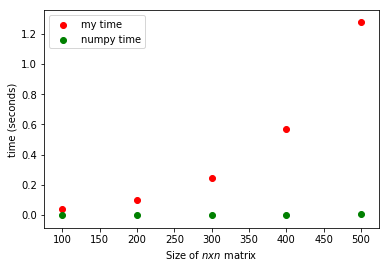

In [66]:
plt.scatter(n_list,my_time, color='red', label = 'my time')
plt.scatter(n_list,numpy_time, color='green', label='numpy time')

plt.xlabel('Size of $n x n$ matrix');
plt.ylabel('time (seconds)')
plt.legend();

Based on the above results, you can see that the ```numpy``` algorithm not only is faster but also "scales" at a slower rate than your algorithm.  

&#9989; <font color=red>**QUESTION:**</font> Why do you think the ```numpy``` matrix multiplication is so much faster?  

I have to convert lists to arrays - they are given it in matrix object. This is quicker than the answer in class since im using dot product and it vectorizes instead of having an additional loop calculating dot product. numpy library is already compiled so it doesnt have to be compiled like mine, also numpy can be utilizing parallel computing. 

# 4. Algorithm Complexity (Estimating Big-O)
In the above example, as the size of the input $n$ gets bigger, the algorithm takes longer to complete. 
Some algorithms work fine for small inputs but then "blow up" when you give them bigger inputs. 
Computer scientists have come up with a notation called "Big-O" that provides a way to compare the speed or memory usage of different algorithms by quantifying using a simple estimate how well an algorithm scales as its inputs get bigger.  

For example, the following are some Big-O syntax, ordered by size. 
An algorithm with "Big-O" scaling on the left hand is considered better than an algorithm with "Big-O" scaling on the right hand:

$$O(1) < O(\log{n}) < O(n) < O(n^2) < O(n^3) < O(n!)$$


The stuff inside the parentheses is a function. 
We can graph these functions as follows:

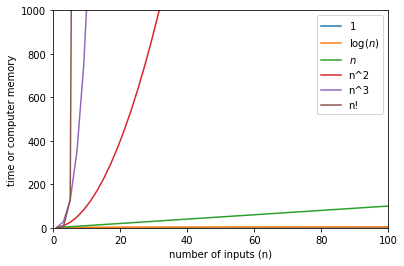

In [69]:
import scipy as sp
from scipy.special import factorial

n = np.linspace(1,100)

plt.plot(n,np.ones(n.size), label='$1$')
plt.plot(n,np.log(n), label='$\log(n)$')
plt.plot(n,n, label='$n$')
plt.plot(n,n**2, label='n^2')
plt.plot(n,n**3, label='n^3')
plt.plot(n,factorial(n), label='n!')

plt.axis([0,100,0,1000])
plt.xlabel('number of inputs (n)')
plt.ylabel('time or computer memory')
plt.legend();

&#9989; <font color=red>**QUESTION:**</font> Many commonly used algorithms have Big-O notation of $O(n\log(n))$. In your groups discuss if this is faster or slower than $O(n^2)$ and why. 

O(nlog(n)) is faster than O(n^2) since log(n) < n as n approaches infinity

&#9989; <font color=red>**QUESTION:**</font> As a group, can you estimate the "Big-O" notation for the algorithm you developed in in Section 3? Be prepared to explain your answer to the class. 

Answer given in class with the 3 loops would be O(n^3). Using dot product that I used, is still O(n^3)

-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your names in the first cell).


&#169; Copyright 2018,  Michigan State University Board of Trustees